In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=1.5)
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
df_train.isnull().sum()/df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [12]:
df_test.isnull().sum()/df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

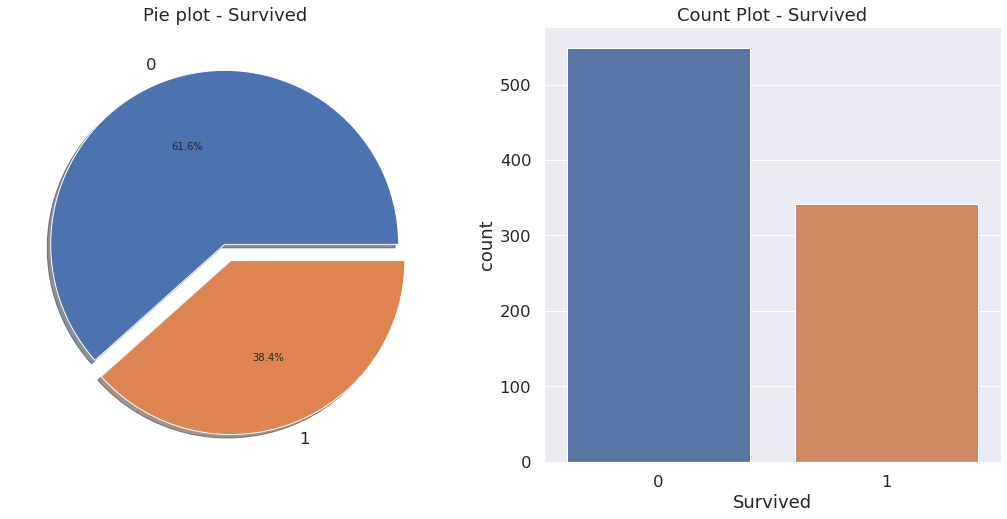

In [13]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count Plot - Survived')

plt.show()

# 02 탐색적 데이터 분석 Exploratory Data Analysis
## 2.1 Pclass

In [14]:
#pclass 그룹 별 데이터 카운트
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [17]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


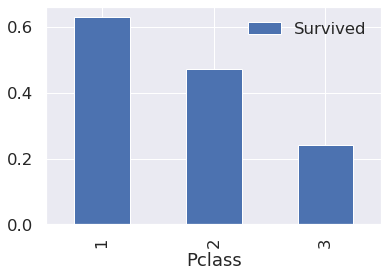

In [18]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

<function matplotlib.pyplot.show(*args, **kw)>

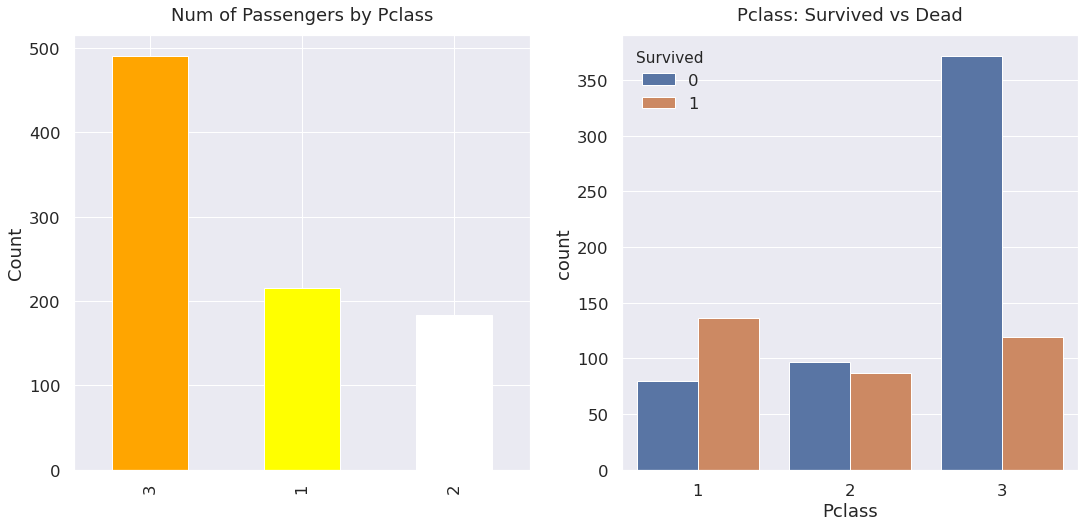

In [19]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['orange','yellow','white'], ax=ax[0])
ax[0].set_title('Num of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show

## 2.2 Sex

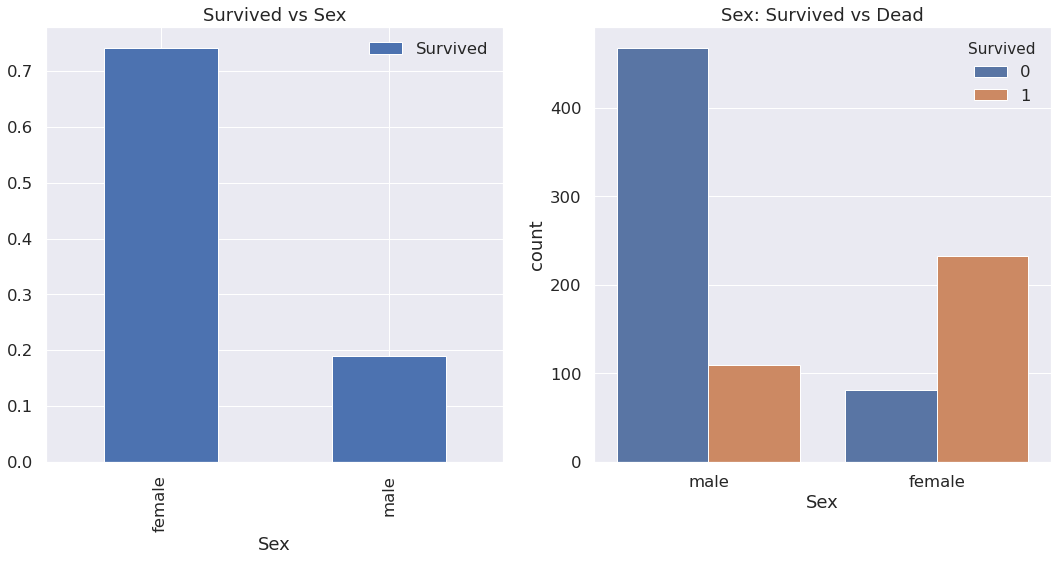

In [20]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [21]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
pd.crosstab(df_train['Sex'],df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

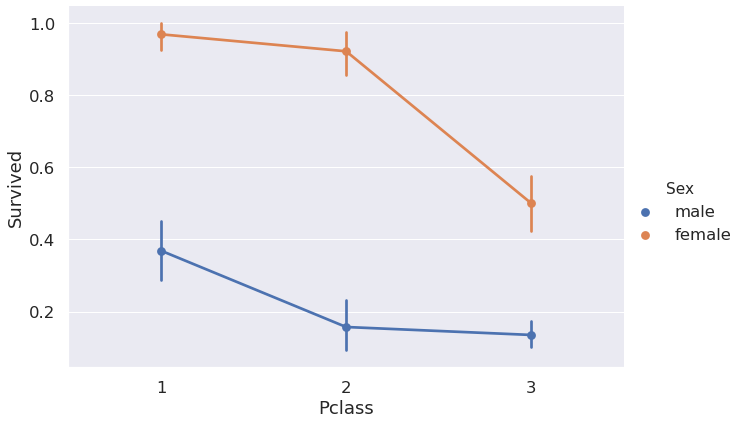

In [23]:
sns.factorplot('Pclass','Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

- 모든 클래스에서 female 이 살 확률이 male 이 살 확률 보다 높다.
- 또한 남녀 상관없이 클래스가 높을수록 살 확률이 높다.
- 위 그래프는 hue 대신 column으로 하면 아래와 같아진다.

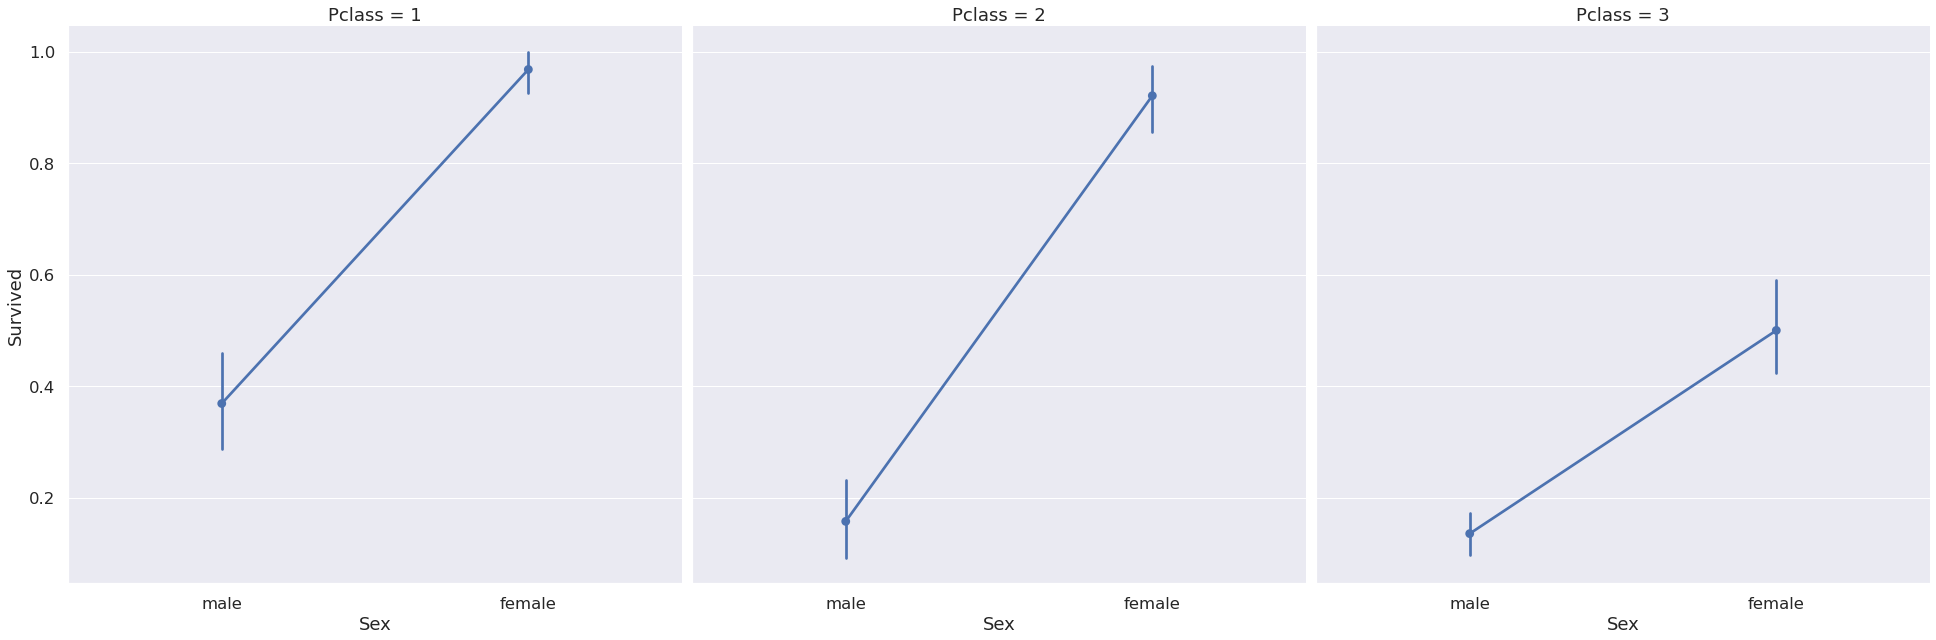

In [24]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5,size=9,aspect=1)

## 2.4 Age

In [25]:
print("most aged passenger: {:.1f} Years".format(df_train['Age'].max()))
print("most young passenger: {:.1f} Years".format(df_train['Age'].min()))
print("average passenger age: {:.1f} Years".format(df_train['Age'].mean()))

most aged passenger: 80.0 Years
most young passenger: 0.4 Years
average passenger age: 29.7 Years


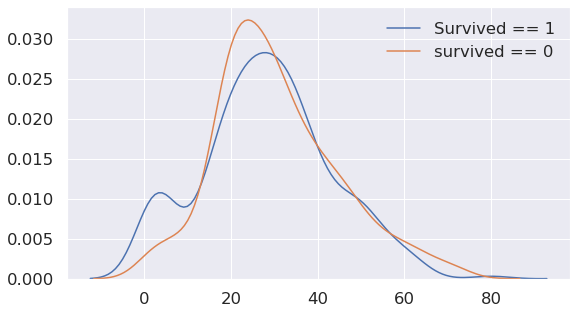

In [26]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'survived == 0'])
plt.show()

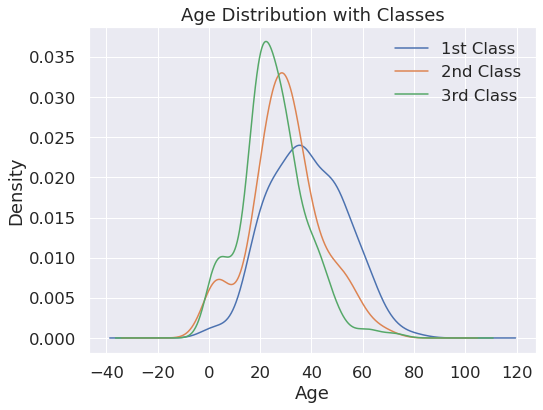

In [27]:
#Age distribution with classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution with Classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- 클래스가 높을수록 나이 많은 사람의 비중이 커짐
- 나이대가 변하면서 생종률이 어떻게 되는지 보려고 한다.
- 나위 범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한 번 보자.

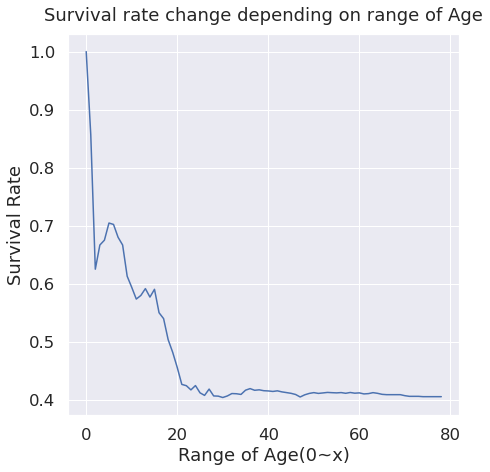

In [28]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival Rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴수록 생존률이 높아짐
- 나이가 중요한 feature로 쓰일 수 있음

## 2.5 Pclass, Sex, Age
- x 축은 계급과 성별, y축은 나이로 보자

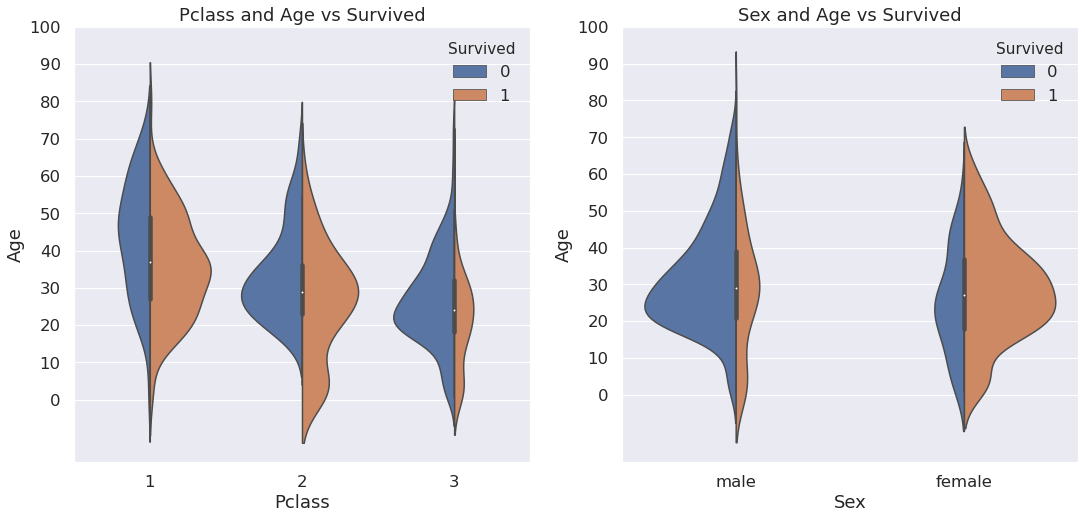

In [29]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 왼쪽 그림은 계급별로 나이의 분배가 어떻게 다른지, 거기에 생존여부에 따라 구분한 그래프이다
- 오른쪽 그림도 마찬가지 성별, 생존에 따른 나이 분포가 어떻게 다른지 보여주는 그래프이다
- 생존만 봤을 때, 모든 클래스에서 나이가 어릴수록 생존을 많이 한 것을 볼 수 있다
- 오른쪽 그림에서 보면 명확히 여자가 더 생존률이 높다
- 여성과 아이를 먼저 챙긴 것을 볼 수 있다

## 2.6 Embarked

In [30]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

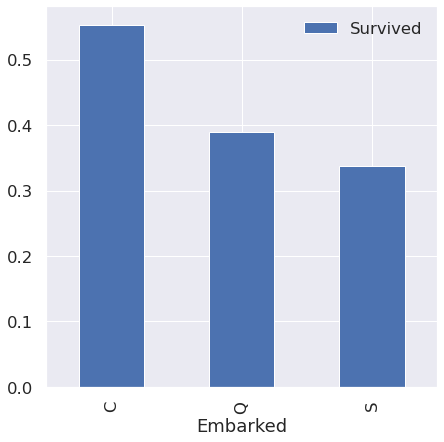

In [31]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 생존률 큰 차이 없음 그래도 c가 제일 높음
- 모델을 만든 후에야 각 feature가 얼마나 중요한 역할을 했는지 판단할 수 있다 이는 추후에 판단
- 다른 feature로 split하여 살펴보자

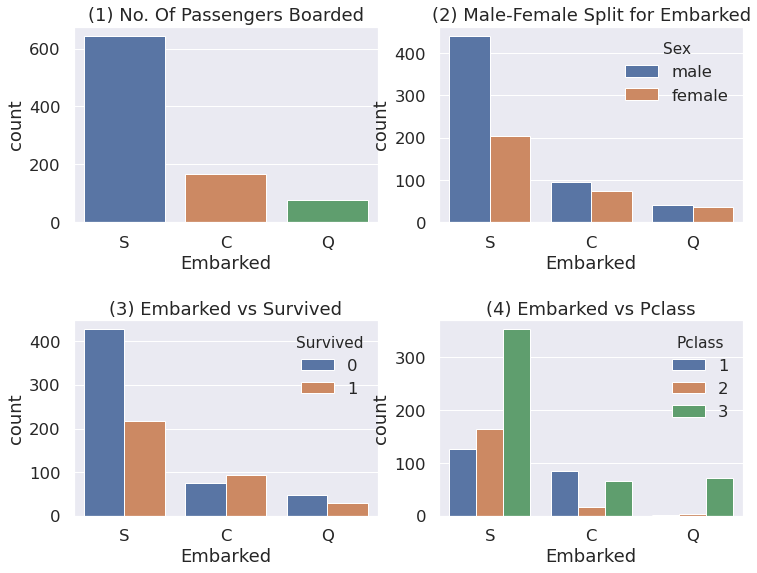

In [32]:
f, ax=plt.subplots(2,2,figsize=(12, 9))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 1. S에서 가장 많은 사람들이 탑승함
- 2. C와 Q는 남녀 비율이 비슷하고, S는 남자 비율이 더 많다.
- 3. 생존확률이 S는 많이 낮다.
- 4. C가 생존확률이 높은 것은 클래스가 높은 사람이 많이 탑승해서 그렇다. S는 3rd class가 가장 많아서 생존확률이 낮다.

## 2.6 Family - Sibsp + Parch

In [33]:
#자기 자신을 포함해야 하니 1을 더합니다.
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [34]:
print('Max size of Family: ', df_train['FamilySize'].max())
print('Min size of Family: ', df_train['FamilySize'].min())

Max size of Family:  11
Min size of Family:  1


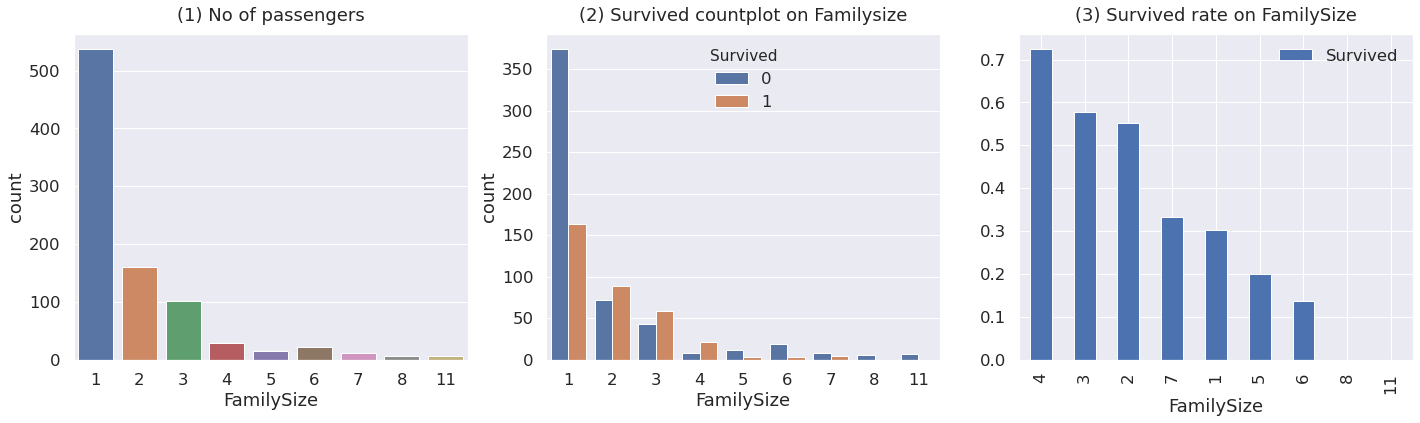

In [35]:
f, ax = plt.subplots(1,3,figsize=(24, 6))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No of passengers', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot on Familysize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 1. 가족크기가 1~11로 다양. 대부분 1명
- 2,3. 가족 크기에 따른 생존비교. 가족이 4명인 경우가 가장 생존확률 높음.

## 2.8 Fare
- 탑승요금, 연속형 feature 히스토그램으로 표현

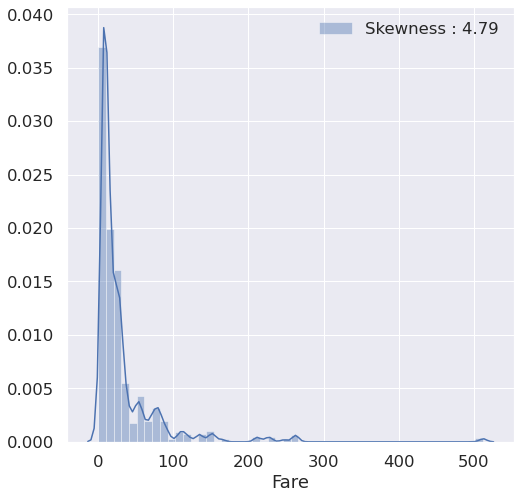

In [36]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 분포가 매우 비대칭(high skewness) 이대로 모델에 학습시키면 자칫 편향되게 학습할 수 있음
- outlier의 영향을 줄이기 위해 log를 취함
- lambda로 간단히 로그를 적용하는 함수를 map에 인수로 넣어줄 수 있음

In [37]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare']=df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare']=df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

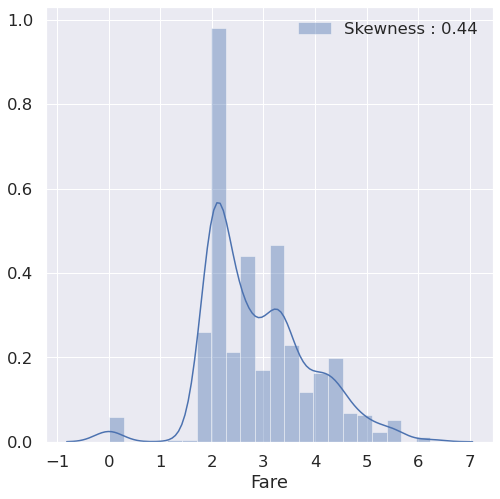

In [38]:
fig, ax=plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 로그르 취해 비대칭이 많이 사라짐
- 이런 작업으로 모델의 성능을 더 높힐 수 있음
- 방금 한 작업은 보통 feature engineering에서 함

## 2.9 Cabin
- 이 feature의 NaN이 대략 80%이므로, 정보를 얻기가 힘듬,,(쓰루)

## 2.10 Ticket
- string 데이터 이기 때문에 가공해야 함. 어떻게 가공할지는 우리의 아이디어가 필요

In [39]:
df_train['Ticket'].value_counts()

CA. 2343      7
347082        7
1601          7
347088        6
3101295       6
             ..
336439        1
364846        1
2690          1
SC/AH 3085    1
371060        1
Name: Ticket, Length: 681, dtype: int64

# 3. Feature Engineering
- 본격적 feature engineering
- dataset에 존재하는 null data 채우기
- 아이디어를 짜내서 채울 수 있음!
- 신경 써야 할 부분임..!

## 3.1 Fill Null
### 3.1.1 Fill Null in Age using title
- age에는 null 데이터가 177개나 있음 
- 영어에서 사용하는 miss, mrr, mrs로 나이 유추해보자!

In [40]:
df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial']=df_test.Name.str.extract('([A-Za-z]+)\.')

In [41]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [42]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

In [43]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


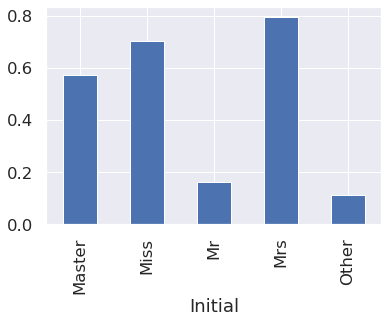

In [44]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [45]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'), 'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_train.Initial=='Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_train.Initial=='Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_train.Initial=='Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_train.Initial=='Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_train.Initial=='Other'), 'Age'] = 46

### 3.1.2 Fill Null in Embarked

In [46]:
print('Embarked has', sum(df_train['Embarked'].isnull()), 'Null Values')

Embarked has 2 Null Values


- 널 발류 2개고 S가 가장 탑승객 많았으니까 그냥 S로 추정하여 채움

In [47]:
df_train['Embarked'].fillna('S', inplace=True)

## 3.2 Change Age(continuous to categorical
- age 는 현재 continuous feature 입니다. age를 몇개의 group으로 나누어 category화 시킬 수도 있습니다. information loss가 생길수도 있지만 그것은 모델에 따라 다르게 적용!
- 10살 기준으로 나누어봅시다,,,

In [48]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)

In [49]:
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [50]:
df_train.drop(['Age'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

## 3.3 Change Initial, Embarked and Sex (string to numerical)
- 현재 initial은 mr, mrs, miss, master, other로 이루어짐
- 컴퓨터가 인식할 수 있도록 수치화 시켜야 함

In [51]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [52]:
df_train['Embarked'].isnull().any()

False

In [53]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

- 이제 feature 간 상관관계를 확인해보겠음 pearson correlation을 구하면 (-1,1) 사이의 값을 얻을 수 있음

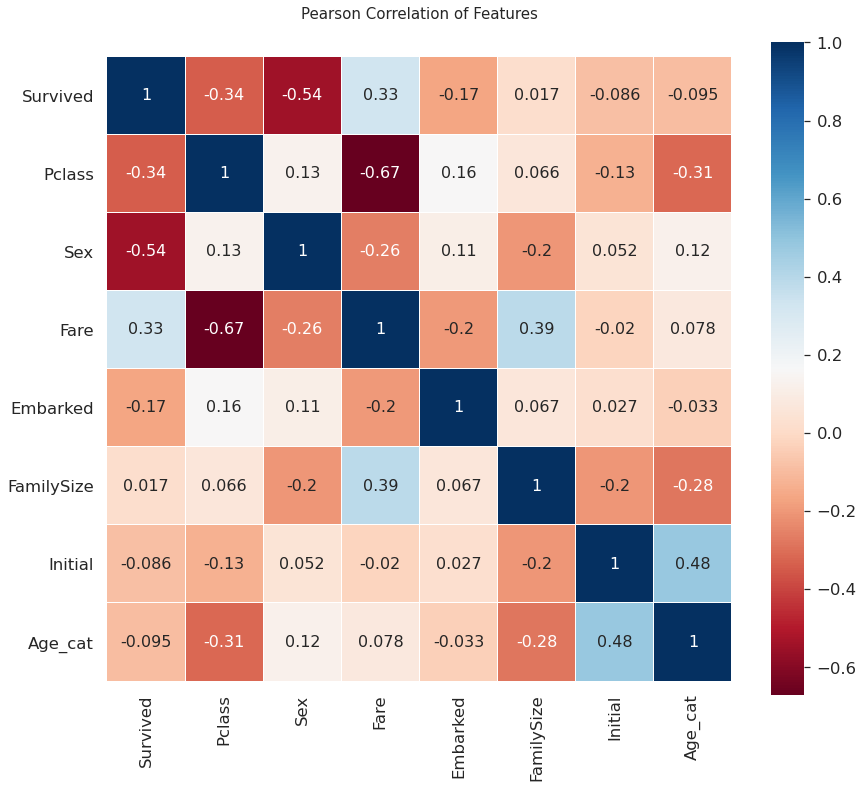

In [54]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":16})

del heatmap_data

- Sex, Pclass 가 생존확률에 상관관계가 어느정도 있음을 알 수 있음
- 생각보다 fare와 embarked도 상관관계가 있음
- 서로 강한 상관관곌르 가지는 feature가 없음
- 이는 우리가 redundant, superfluous 한 feature가 없다는 것을 의미함. 1 / -1 의 상관관계를 가진다면 우리가 얻을 수 있는 정보는 하나이기 때문

## 3.4 One-hot encoding on Initial and Embarked
- 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 원핫 인코딩을 할 수 있다

In [55]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [56]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [57]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

## 3.5 Drop columns

In [58]:
df_train.drop(['PassengerId','Name', 'SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId','Name', 'SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)

In [59]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [60]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


# 04 Building machine learning model and prediction using the tranied model

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 4.1 Preparation - Split dataset into train, valid, test set

In [62]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

- 실제 좋은 모델을 만들기 위해서는 test, train뿐만 아니라 valid set을 따로 만들어야 합니다
- 축구대표팀이 팀훈련(train)을 하고 바로 월드컵(test)으로 나가는 것이 아니라, 팀훈련(train)을 한 다음 평가전(valid)을 거쳐 팀의 훈련 정도(학습정도)를 확인하고 월드컵(test)에 나가는 것과 비슷합니다.
- train_test_split을 사용하여 쉽게 train셋을 분리할 수 있습니다.

In [63]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2021)

- skelearn 에서는 여러 머신러닝 알고리즘을 지원해줍니다.
- 공부 공부 공부!

## 4.2 Model generation and prediction

In [64]:
model_1 = RandomForestClassifier()
model_1.fit(X_tr, y_tr)
prediction_1 = model_1.predict(X_vld)

print('총 {}명 중 {:.2f}% 정확도로 생존확률을 맞췄습니다.'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction_1, y_vld)))

총 268명 중 80.97% 정확도로 생존확률을 맞췄습니다.


In [65]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

print('총 {}명 중 {:.2f}% 정확도로 생존확률을 맞췄습니다.'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 81.34% 정확도로 생존확률을 맞췄습니다.


## 4.3 Feature importance
- 학습된 모델은 feature importance 를 가지게 되는데, 우리는 이것을 확인하여 지금 만든 모델이 어떤 feature에 영향을 많이 받았는지 확인할 수 있습니다.

In [66]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

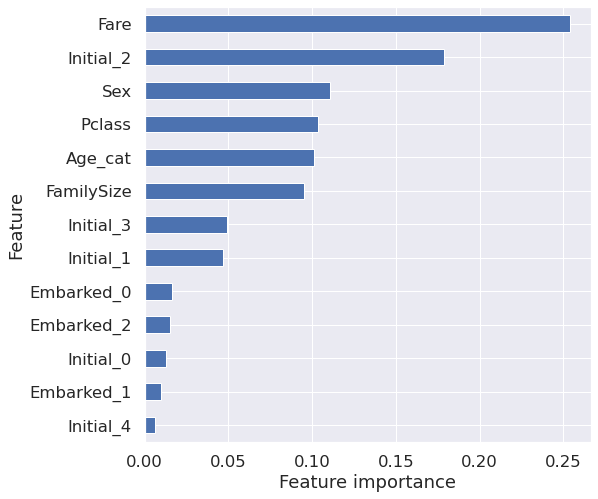

In [67]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

- fare 영향력 젤 큼,
- 이것만으로는 정확도 높은 모델을 위한 feature인지는 판단 못함,, 통계적 지식 더 필요
- feature selection이나 더 빠른 속도를 위해 feature를 제거할 수 있습니다.

## 4.4 Prediction on Test set
- 모델이 학습하지 않았던 테스트 셋으로 결과를 예측해보겠습니다.
- 이제는 제출용임!

In [68]:
prediction = model.predict(X_test)
output = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
output['Survived'] = prediction
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
